In [31]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt


# --------------------------------------------------
# Dummy prm class (use your real one instead)
# --------------------------------------------------
class Params(object):
    pass

prm = Params()
prm.r_chromo = 1.02
prm.r_corona = 1.05


# --------------------------------------------------
# ELECTRON DENSITY MODEL
# --------------------------------------------------


def density_only(prm, x, y, z):
    
     # ---------- radius ----------
    r2 = x*x + y*y + z*z
    r = math.sqrt(r2)

    global r_corm16, r_corm6, r_corm2d5

    R0 = 6.955e5

    g1 = 3.09e8
    g2 = 1.58e8
    g3 = 2.51e6

    r_corm16 = prm.r_corona**(-16)
    r_corm6 = prm.r_corona**(-6)
    r_corm2d5 = prm.r_corona**(-2.5)

    A = np.zeros((4,4))

    A[0] = [1., prm.r_chromo, prm.r_chromo**2, prm.r_chromo**3]
    A[1] = [1., prm.r_corona, prm.r_corona**2, prm.r_corona**3]
    A[2] = [0., 1., 2.*prm.r_chromo, 3.*prm.r_chromo**2]
    A[3] = [0., 1., 2.*prm.r_corona, 3.*prm.r_corona**2]

    A = np.linalg.inv(A)

    rhsa = np.zeros(4)
    rhsa[0] = 5.7e11 * math.exp(-7.7e-4*(R0*(prm.r_chromo-1)-500))

    a = np.dot(A, rhsa)

    # ---------- chromosphere ----------
    if r < prm.r_chromo:

        Ne = 5.7e11 * math.exp(-7.7e-4*(R0*(r-1)-500))

    else:

        rm2d5 = r**(-2.5)
        rm6 = r**(-6)
        rm16 = r**(-16)

        cosTh = abs(z/r)
        sqrtCosTh = math.sqrt(cosTh)

        t1 = 1.0 - 0.5*cosTh
        t2 = 1.0 - 0.95*cosTh
        t3 = 1.0 - sqrtCosTh

        if r < prm.r_corona:

            saito_rcor = g1*r_corm16*t1 + g2*r_corm6*t2 + g3*r_corm2d5*t3

            rhsb = np.zeros(4)
            rhsb[1] = 1.
            rhsb[2] = -438.9e6*R0 * \
                math.exp(-7.7e-4*(R0*(prm.r_chromo-1)-500)) / saito_rcor

            rhsb[3] = (-16.*g1*(prm.r_corona**(-17))*t1
                       -6.*g2*(prm.r_corona**(-7))*t2
                       -2.5*g3*(prm.r_corona**(-3.5))*t3) / saito_rcor

            b = np.dot(A, rhsb)

            Ne = (a[0] + r*(a[1] + r*(a[2] + r*a[3]))
                  + (b[0] + r*(b[1] + r*(b[2] + r*b[3]))) * saito_rcor)
            print(r,Ne,saito_rcor)

        else:

            Ne = g1*rm16*t1 + g2*rm6*t2 + g3*rm2d5*t3

    return Ne


In [33]:
## --------------------------------------------------
# Radius grid along X-axis
# --------------------------------------------------
r_vals = np.linspace(1.0, 3.0, 4000)   # in solar radii
Ne_vals = []

# Evaluate along x-axis: (x=r, y=0, z=0)
for r in r_vals:

    x = r
    y = 0.0
    z = 0.0

    Ne = density_only(prm, x, y, z)   # <-- FIXED
    Ne_vals.append(Ne)

Ne_vals = np.array(Ne_vals)



(1.0200050012503126, 18634446.16414484, 261680270.00075588)
(1.0205051262815703, 14026906.091384692, 261680270.00075588)
(1.0210052513128283, 10181097.094247768, 261680270.00075588)
(1.021505376344086, 7072799.425976098, 261680270.00075588)
(1.0220055013753437, 4677793.252863005, 261680270.00075588)
(1.0225056264066017, 2971858.7719095442, 261680270.00075588)
(1.0230057514378594, 1930776.2049175948, 261680270.00075588)
(1.0235058764691174, 1530325.7493764888, 261680270.00075588)
(1.0240060015003751, 1746287.579195451, 261680270.00075588)
(1.0245061265316329, 2554441.9542558473, 261680270.00075588)
(1.0250062515628908, 3930569.0261074845, 261680270.00075588)
(1.0255063765941486, 5850449.014110832, 261680270.00075588)
(1.0260065016254063, 8289862.140800189, 261680270.00075588)
(1.0265066266566643, 11224588.564608838, 261680270.00075588)
(1.027006751687922, 14630408.536581544, 261680270.00075588)
(1.0275068767191797, 18483102.216616437, 261680270.00075588)
(1.0280070017504377, 22758449.82

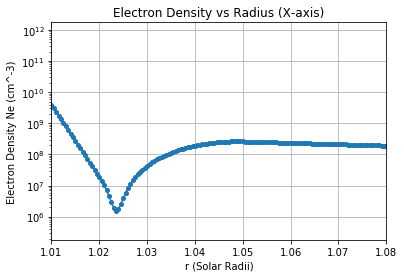

('Upper Boundary of Chromosphere=', 1.02, 'Lower Boundary of Corona=', 1.05)


In [38]:

# --------------------------------------------------
# Plot
# --------------------------------------------------
plt.figure()

plt.plot(r_vals, Ne_vals, linestyle='-', marker='o', markersize=4)

plt.xlabel('r (Solar Radii)')
plt.ylabel('Electron Density Ne (cm^-3)')
plt.title('Electron Density vs Radius (X-axis)')
plt.xlim(1.01, 1.08)
plt.yscale('log')
plt.grid(True)
plt.show()
plt.show()
print('Upper Boundary of Chromosphere=', prm.r_chromo, 'Lower Boundary of Corona=', prm.r_corona)

In [20]:
print(r_vals)

[1.         1.00501253 1.01002506 1.01503759 1.02005013 1.02506266
 1.03007519 1.03508772 1.04010025 1.04511278 1.05012531 1.05513784
 1.06015038 1.06516291 1.07017544 1.07518797 1.0802005  1.08521303
 1.09022556 1.0952381  1.10025063 1.10526316 1.11027569 1.11528822
 1.12030075 1.12531328 1.13032581 1.13533835 1.14035088 1.14536341
 1.15037594 1.15538847 1.160401   1.16541353 1.17042607 1.1754386
 1.18045113 1.18546366 1.19047619 1.19548872 1.20050125 1.20551378
 1.21052632 1.21553885 1.22055138 1.22556391 1.23057644 1.23558897
 1.2406015  1.24561404 1.25062657 1.2556391  1.26065163 1.26566416
 1.27067669 1.27568922 1.28070175 1.28571429 1.29072682 1.29573935
 1.30075188 1.30576441 1.31077694 1.31578947 1.32080201 1.32581454
 1.33082707 1.3358396  1.34085213 1.34586466 1.35087719 1.35588972
 1.36090226 1.36591479 1.37092732 1.37593985 1.38095238 1.38596491
 1.39097744 1.39598997 1.40100251 1.40601504 1.41102757 1.4160401
 1.42105263 1.42606516 1.43107769 1.43609023 1.44110276 1.446115

In [39]:
from scipy.optimize import minimize_scalar

def middle_density(r, prm):
    # evaluate density only along x-axis (theta fixed)
    return density_only(prm, r, 0.0, 0.0)

def find_minimum_middle(prm):

    result = minimize_scalar(
        middle_density,
        bounds=(prm.r_chromo, prm.r_corona),
        args=(prm,),
        method='bounded'
    )

    r_min = result.x
    Ne_min = result.fun

    return r_min, Ne_min


r_min, Ne_min = find_minimum_middle(prm)

print("Minimum occurs at r =", r_min)
print("Minimum Ne =", Ne_min)

(1.0314589803375032, 61834293.79418973, 261680270.00075588)
(1.038541019662497, 167751422.75313893, 261680270.00075588)
(1.0270820393249938, 15182405.56979038, 261680270.00075588)
(1.0243769410125094, 2290310.04194328, 261680270.00075588)
(1.0228656168152899, 2156840.6341698635, 261680270.00075588)
(1.0235814754480392, 1524020.6281392928, 261680270.00075588)
(1.0235851538324907, 1524071.7312354762, 261680270.00075588)
(1.0235777480649582, 1524002.6760829724, 261680270.00075588)
(1.0235743995495132, 1524015.5882007927, 261680270.00075588)
('Minimum occurs at r =', 1.0235777480649582)
('Minimum Ne =', 1524002.6760829724)


(1.02, 18684450.267279997, 261680270.00075588)
(1.0200601202404809, 18088549.941032168, 261680270.00075588)
(1.020120240480962, 17503968.464901935, 261680270.00075588)
(1.0201803607214428, 16930663.74456294, 261680270.00075588)
(1.0202404809619239, 16368593.7407091, 261680270.00075588)
(1.0203006012024047, 15817716.373513436, 261680270.00075588)
(1.0203607214428858, 15277989.566322792, 261680270.00075588)
(1.0204208416833667, 14749371.240042608, 261680270.00075588)
(1.0204809619238477, 14231819.33081012, 261680270.00075588)
(1.0205410821643286, 13725291.747228662, 261680270.00075588)
(1.0206012024048097, 13229746.432074804, 261680270.00075588)
(1.0206613226452905, 12745141.314602304, 261680270.00075588)
(1.0207214428857716, 12271434.326262195, 261680270.00075588)
(1.0207815631262525, 11808583.378390886, 261680270.00075588)
(1.0208416833667335, 11356546.42504296, 261680270.00075588)
(1.0209018036072144, 10915281.37164792, 261680270.00075588)
(1.0209619238476955, 10484746.14794781, 26168

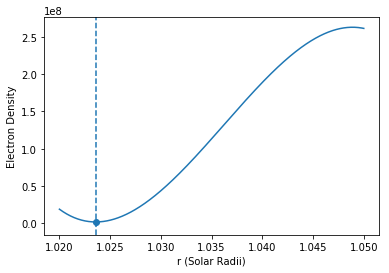

In [40]:
r_vals = np.linspace(prm.r_chromo, prm.r_corona, 500)
Ne_vals = [middle_density(r, prm) for r in r_vals]

plt.plot(r_vals, Ne_vals)
plt.axvline(r_min, linestyle='--')
plt.scatter(r_min, Ne_min)
plt.xlabel("r (Solar Radii)")
plt.ylabel("Electron Density")
plt.show()